# Simple Logistic Regression

1. Look at the data
2. Linear separable problem
3. The vector reprsentation
4. Standardization
5. Add bias
6. Sigmoid function
7. Likelifood function
8. Update parameter 𝜃
9. Plot the line

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("../Downloads/datasets/linear_data.csv")

## 1. Look at the data

In [10]:
data

,x1,x2,y
0,153,432,0
1,220,262,0
2,118,214,0
3,474,384,1
4,485,411,1
5,233,430,0
6,396,321,1
7,484,349,1
8,429,259,1
9,286,220,1


In [11]:
data.shape

(20, 3)

In [20]:
data = data.to_numpy()

In [22]:
data

array([[153, 432,   0],
       [220, 262,   0],
       [118, 214,   0],
       [474, 384,   1],
       [485, 411,   1],
       [233, 430,   0],
       [396, 321,   1],
       [484, 349,   1],
       [429, 259,   1],
       [286, 220,   1],
       [399, 433,   0],
       [403, 300,   1],
       [252,  34,   1],
       [497, 372,   1],
       [379, 416,   0],
       [ 76, 163,   0],
       [263, 112,   1],
       [ 26, 193,   0],
       [ 61, 473,   0],
       [420, 253,   1]])

In [36]:
train_x = data[:, :2]
train_y = data[:, 2]

In [37]:
train_x

array([[153, 432],
       [220, 262],
       [118, 214],
       [474, 384],
       [485, 411],
       [233, 430],
       [396, 321],
       [484, 349],
       [429, 259],
       [286, 220],
       [399, 433],
       [403, 300],
       [252,  34],
       [497, 372],
       [379, 416],
       [ 76, 163],
       [263, 112],
       [ 26, 193],
       [ 61, 473],
       [420, 253]])

In [40]:
train_y

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1])

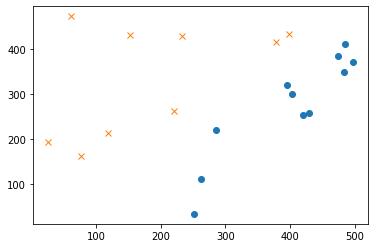

In [39]:
plt.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], 'o')
plt.plot(train_x[train_y == 0, 0], train_x[train_y == 0, 1], 'x')
plt.show()

## 2. Linear separable problem

We need to find model for such a problem. The most simple case is using linear function.

$$f𝜃(x) = 𝜃_0 + 𝜃_1x$$

In [41]:
def f(x):
    return theta[0] + theta[1] * x

## 3.The vector representation

We also can rewrite the linear function as a more simple way, the vector way.

$$f𝜃(x) = 𝜃^T x$$

In [43]:
def f(x):
    return np.dot(theta, x)

If both vectors are 1-D arrays, it is inner product of vectors (without complex conjugation). So np.dot(theta, x) do the same thing like np.dot(theta.T, x).

## 4.Standardization

In order to make training converge fast, we use standardization, also called z-score. We do it column-wise.

Xstd = (X - mu) / sigma

* mu is mean in each column
* sigma is the standard deviation in each column

In [44]:
mu = train_x.mean(axis = 0)
sigma = train_x.std(axis = 0)

def standardizer(x):
    return (x - mu) / sigma

std_x = standardizer(train_x)

## 5. Add bias

We need to add bias term to our function to make our model have a better generalization. So we increase the parameter from 2 to 3. And add a constant x0 = 1 in order to align the vector representation.
In order to make the calculation more simple, we convert x to a matrix.

In [45]:
theta = np.random.randn(3)

def to_matrix(std_x):
    return np.array([[1, x1, x2] for x1, x2 in std_x])

mat_x = to_matrix(std_x)

def f(x):
    return np.dot(x, theta)

The dimension of std_x is (20, 2). After to_matrix(std_x), the dimension of mat_x is (20, 3). As for the dot product pard, notice here we change the position of x and theta, the dimension of theta is (3, ). So the result of dot production should be (20, 3) x (3, ) -> (20, ), which is a 1-D array containing predictions for 20 samples.

## 6.Sigmoid function

f𝜃(x)= 1 / 1 + exp(-z)

z = 𝜃.Tx

We use the z to represent the linear function and pass it to sigmoid function. The sigmoid function will give a probability for each data sample. We have two class in our data, one is 1 and another is 0.

We can see the model predict the sample based on the linear function part.

f𝜃(z) = {1 (z >= 0), 0 (z < 0)}

In [46]:
def f(x):
    return 1 / (1 + np.exp(-np.dot(x, theta)))

## 7. Likelihood function

A goal function can guide us on how to update the parameter in the right way. As for sigmoid(logistic regression), we usually use log likelihood as the goal function.

## 8.Update parameter 𝜃

In [50]:
learning_rate = 1e-3
epoch = 2000

for _ in range(epoch):
    theta = theta - learning_rate * np.dot(f(x) - train_y, mat_x)

NameError: name 'x' is not defined